In [6]:
import math
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
style.use('ggplot')
tata = pdr.get_data_yahoo('TATAMOTORS.NS', start = '2010-01-01')

[*********************100%***********************]  1 of 1 completed


In [2]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 17.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [7]:
tata.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,156.303482,164.040497,156.184769,163.535919,153.140778,27906448
2010-01-05,162.259598,167.147186,153.246277,160.686478,150.472473,23669317
2010-01-06,162.200241,162.932388,159.311234,160.933823,150.704102,14990820
2010-01-07,161.171280,161.923218,154.344498,155.432831,145.552765,22722030
2010-01-08,156.323273,159.251862,155.343781,156.283707,146.349564,16495776


In [8]:
time_elapsed = (tata.index[-1]-tata.index[0]).days
print(time_elapsed)

4565


In [9]:
Agg_growth = (tata['Adj Close'][-1]/tata['Adj Close'][1]) #total growth
year_equi = time_elapsed / 365
CAGR = (Agg_growth**(1/year_equi))-1
std_dev = tata['Adj Close'].pct_change().std()
trd_days = 252
std_dev_scaled = std_dev * math.sqrt(trd_days)

print(f"CAGR(Mean Annual Returns): {round(CAGR,3)}")
print(f"Standard deviation: {round(std_dev_scaled,3)}")

CAGR(Mean Annual Returns): 0.084
Standard deviation: 0.427


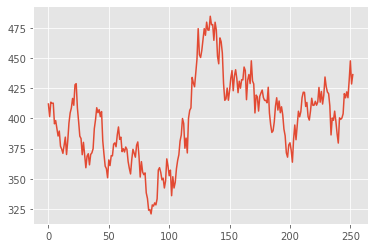

In [10]:
#set to input random value and run the MC simulation
#generating random values for 1 year and normal distribution is used to generate them
daily_return_rand = np.random.normal(CAGR/trd_days,std_dev,trd_days)+1

price_series = [tata['Adj Close'][-1]]
for j in daily_return_rand:
    price_series.append(price_series[-1]*j)
    
plt.plot(price_series)
plt.show()

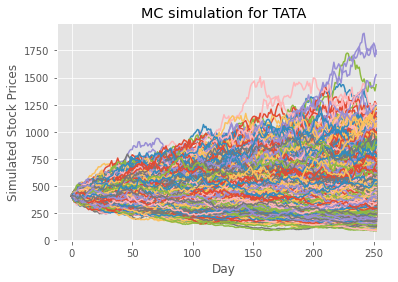

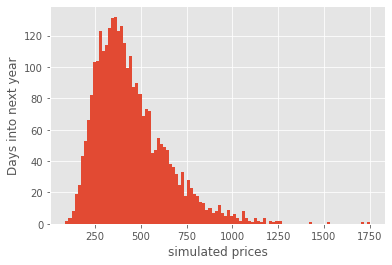

In [11]:
#above is a single random walk, generating large number of times
trials = 3000
closing_prices = []

for i in range(trials):
    daily_return_rand = np.random.normal(CAGR/trd_days,std_dev,trd_days)+1

    price_series = [tata['Adj Close'][-1]]
    for j in daily_return_rand:
        price_series.append(price_series[-1]*j)
    closing_prices.append(price_series[-1])
    
    plt.plot(price_series)
    plt.title('MC simulation for TATA')
    plt.xlabel("Day")
    plt.ylabel("Simulated Stock Prices")
    
plt.show()

#histogram
plt.hist(closing_prices, bins = 100)
plt.xlabel("simulated prices")
plt.ylabel("Days into next year")
plt.show()
    

In [12]:
#calculating mean closing price
mean_close_price = round(np.mean(closing_prices),3)
print(f"Expected price {mean_close_price}")

Expected price 445.796
